## Assignments: 
1. Implement a code that applies LS to maximize the following functions:
 - Sphere function
 - Ackley function
2. Implement simulated annealing (SA)


* Due: **16 Dec 2023 (Sat), before 9:00**
* Submit your code to via MS Teams

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0.92, 'Sphere Function')

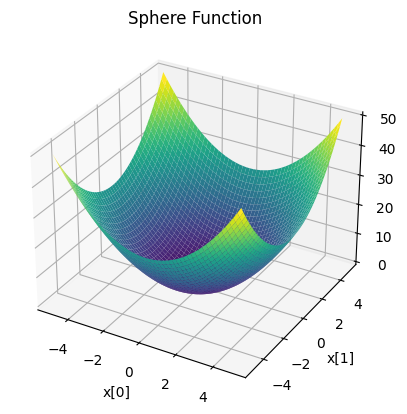

In [2]:
def sphere(x):
    return x[0] * x[0] + x[1] * x[1]

# Create a list of values $x_0$
# Create a list of values $x_1$
step = 0.01
x0 = np.arange(-5, 5, step)
x1 = np.arange(-5, 5, step)

# Create a grid of $x_0$ and $x_1$ using 'np.meshgrid'
x0, x1 = np.meshgrid(x0, x1)

# Evaluate a function $y = f(x_0,x_1)$
y = sphere([x0, x1])

# Plot the function using 'plt.plot_surface'
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x0, x1, y, cmap = cm.viridis, antialiased = True)

# Formatting the plot
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")
ax.set_title("Sphere Function")  

In [3]:
# Derivative of sphere(x)
def sphere_derivative(x):
    return 2 * np.array([x[0], x[1]])

# Local search (LS)
def LS(sphere, sphere_derivative, S, step_size=0.1, t_max=100):
    t = 0
    
    # Find starting point
    x = np.random.uniform(low=S[0], high=S[1], size=2)
    print(x)
    
    # Looping
    while t < t_max:
        y = sphere(x)
        print("t =", t, ": f(", x, ") =", y)
        
        # Calculate gradient
        q = sphere_derivative(x)
        x = x + step_size * q  
        t += 1
    return x, sphere(x)

x_best, y_best = LS(sphere, sphere_derivative, S=[-5, 5], step_size=0.1)

print("Maximum value of the Sphere =", y_best)
print("Optimal solution for the Sphere* =", x_best)

[-3.69332113  3.55754612]
t = 0 : f( [-3.69332113  3.55754612] ) = 26.29675540558614
t = 1 : f( [-4.43198536  4.26905535] ) = 37.86732778404405
t = 2 : f( [-5.31838243  5.12286642] ) = 54.52895200902342
t = 3 : f( [-6.38205892  6.1474397 ] ) = 78.52169089299372
t = 4 : f( [-7.6584707   7.37692764] ) = 113.07123488591095
t = 5 : f( [-9.19016484  8.85231317] ) = 162.82257823571177
t = 6 : f( [-11.02819781  10.6227758 ] ) = 234.464512659425
t = 7 : f( [-13.23383737  12.74733096] ) = 337.628898229572
t = 8 : f( [-15.88060484  15.29679716] ) = 486.1856134505837
t = 9 : f( [-19.05672581  18.35615659] ) = 700.1072833688404
t = 10 : f( [-22.86807097  22.02738791] ) = 1008.1544880511301
t = 11 : f( [-27.44168517  26.43286549] ) = 1451.7424627936275
t = 12 : f( [-32.9300222   31.71943859] ) = 2090.5091464228235
t = 13 : f( [-39.51602664  38.0633263 ] ) = 3010.333170848866
t = 14 : f( [-47.41923197  45.67599156] ) = 4334.879766022366
t = 15 : f( [-56.90307836  54.81118988] ) = 6242.226863072208
t

Text(0.5, 0.92, 'Ackley Function')

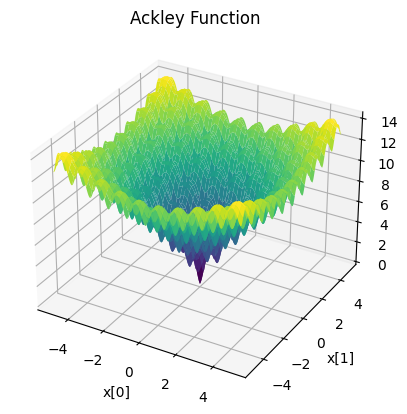

In [4]:
# Define functions
def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1]))) + \
            - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20 

# Create a list of values $x_0$
# Create a list of values $x_1$
step = 0.01
x0 = np.arange(-5, 5, step)
x1 = np.arange(-5, 5, step)

# Create a grid of $x_0$ and $x_1$ using 'np.meshgrid'
x0, x1 = np.meshgrid(x0, x1)

# Evaluate a function $y = f(x_0,x_1)$
y = ackley([x0, x1])

# Plot the function using 'plt.plot_surface'
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x0, x1, y, cmap = cm.viridis, antialiased = True)

# Formatting the plot
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")
ax.set_title("Ackley Function")       

In [5]:
import numpy as np

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1]))) + \
           -np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20

def ackley_derivative(x): #I have no idea how to find its derivative so ????
    sqrt_term = np.sqrt(0.5 * (x[0] * x[0] + x[1] * x[1]))
    exp_term_1 = -20 * np.exp(-0.2 * sqrt_term) * (-0.1 / sqrt_term)
    exp_term_2 = -0.5 * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) * 2 * np.pi
    return np.array([exp_term_1 * x[0] + exp_term_2 * np.sin(2 * np.pi * x[0]),
                     exp_term_1 * x[1] + exp_term_2 * np.sin(2 * np.pi * x[1])])

def LS(ackley, ackley_derivative, S, step_size=0.1, t_max=100):
    t = 0
    
    # Find starting point
    x = np.random.uniform(low=S[0], high=S[1], size=2)
    print(x)
    
    # Looping
    while t < t_max:
        y = ackley(x)
        print("t =", t, ": f(", x, ") =", y)
        
        # Calculate gradient
        q = ackley_derivative(x)
        x = x + step_size * q  
        t += 1
    return x, ackley(x)

x_best, y_best = LS(ackley, ackley_derivative, S=[-5, 5], step_size=0.1)

print("Maximum value of Ackley function =", y_best)
print("Optimal solution for Ackley function =", x_best)

[0.30662053 0.36668437]
t = 0 : f( [0.30662053 0.36668437] ) = 3.424314337033106
t = 1 : f( [0.29914061 0.42912607] ) = 3.5973607184846443
t = 2 : f( [0.28561334 0.5705804 ] ) = 3.874257864468742
t = 3 : f( [0.22676989 0.8784807 ] ) = 3.5833441662857624
t = 4 : f( [-0.19073355  1.45462294] ) = 5.723243653002861
t = 5 : f( [-0.00337556  1.61692144] ) = 5.668904041700344
t = 6 : f( [0.00373349 2.08149574] ) = 5.269162074128975
t = 7 : f( [-0.01467257  1.8998391 ] ) = 4.96587072575015
t = 8 : f( [0.05494182 2.57180113] ) = 7.7968082590511365
t = 9 : f( [-0.04937379  2.9081538 ] ) = 7.015247298452035
t = 10 : f( [0.1821915  3.51512698] ) = 9.813286082495926
t = 11 : f( [-0.02273222  3.70911486] ) = 9.437285647715768
t = 12 : f( [0.04084581 4.31546216] ) = 10.52674608232318
t = 13 : f( [-0.06360515  4.08666343] ) = 9.067062154602054
t = 14 : f( [0.23107676 3.84971376] ) = 9.70363644537637
t = 15 : f( [-0.2028629   4.37539142] ) = 11.141542643170606
t = 16 : f( [0.03401905 4.3475729 ] ) = 10

# Simulated Annealing

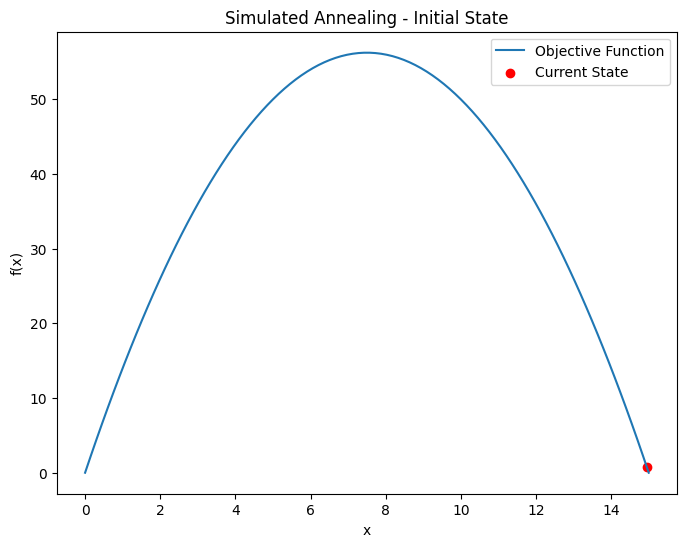

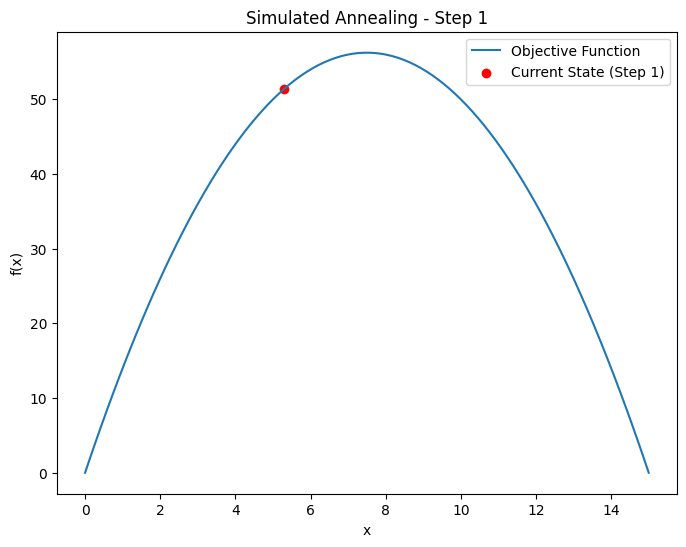

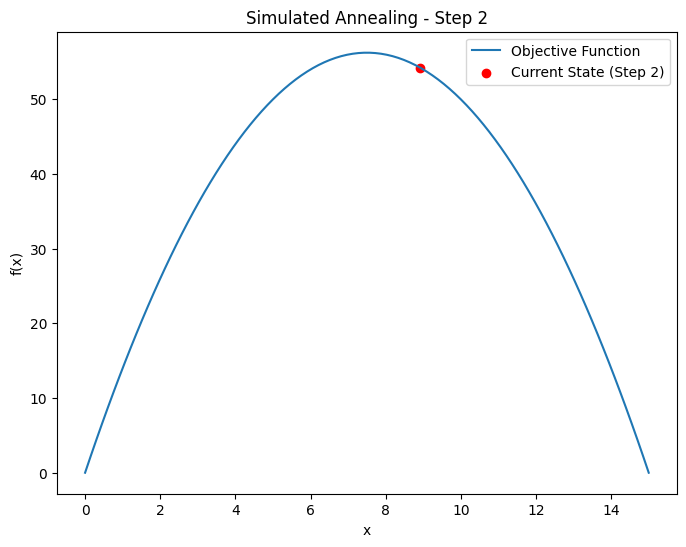

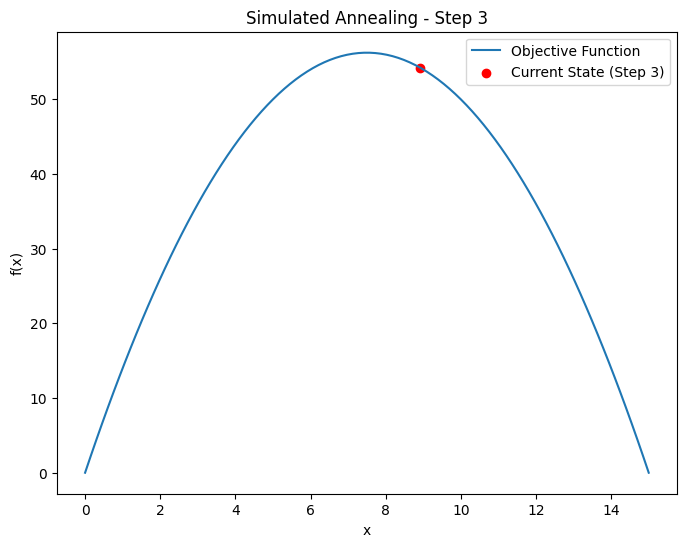

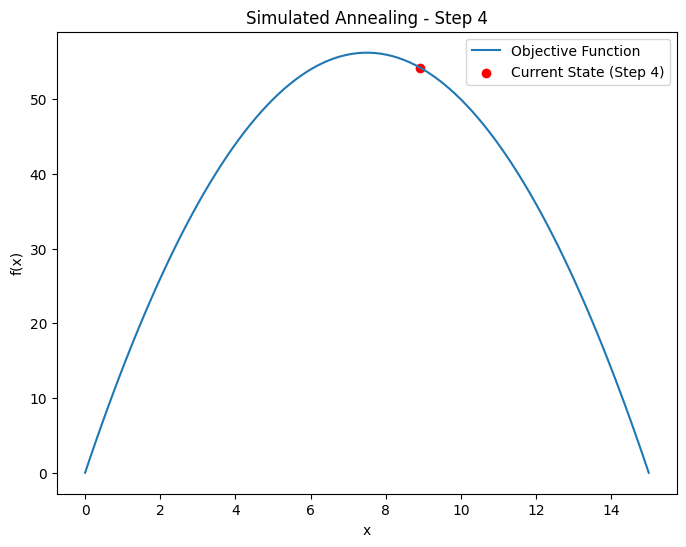

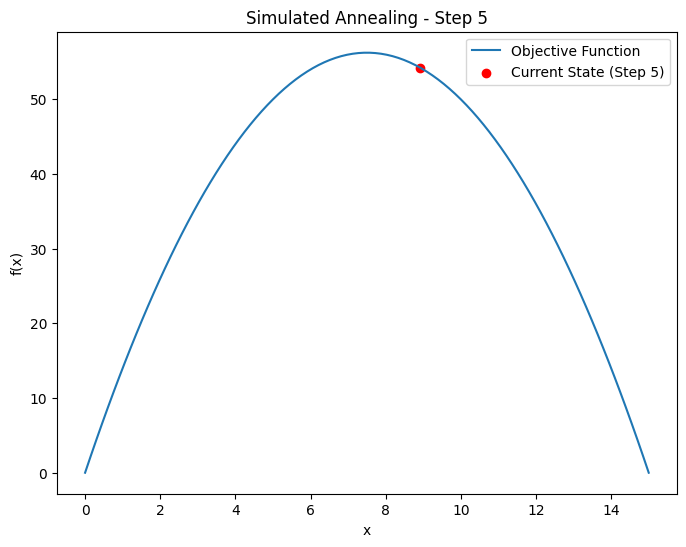

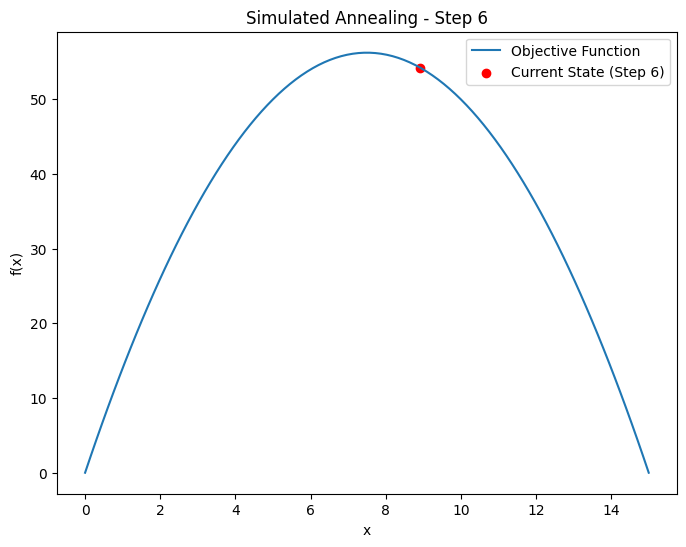

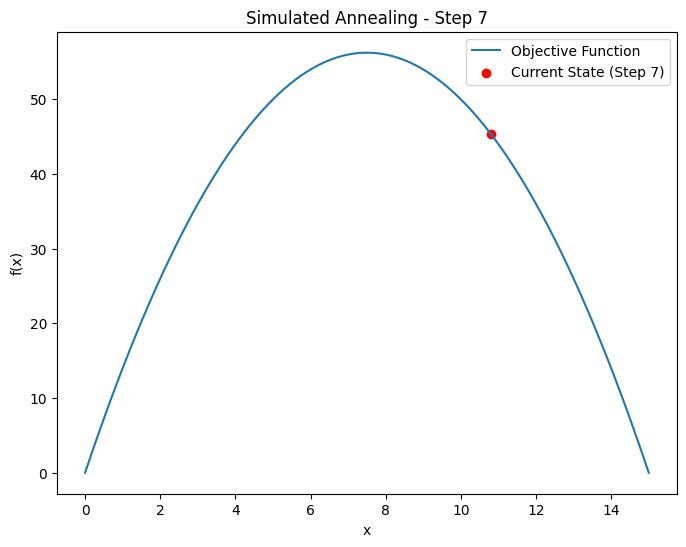

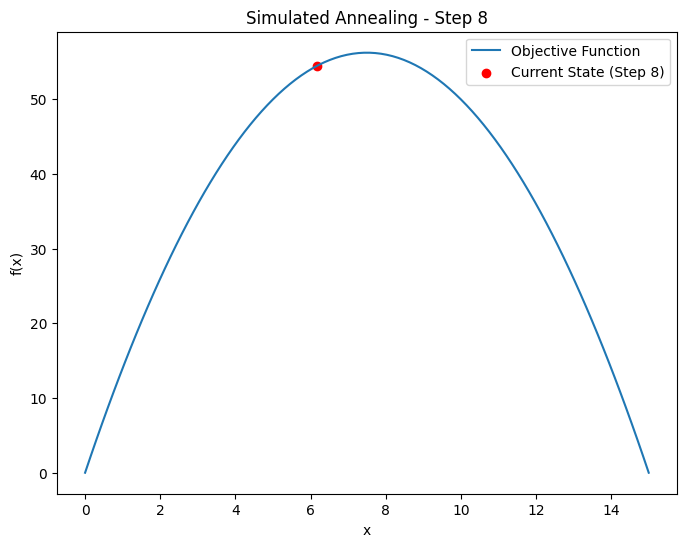

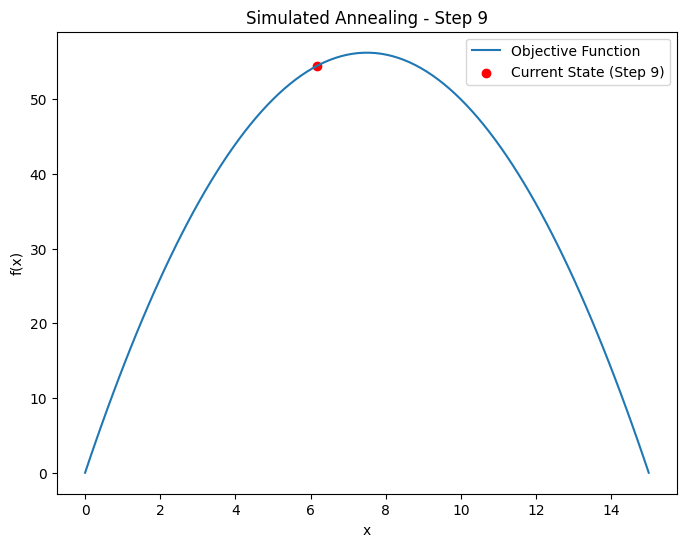

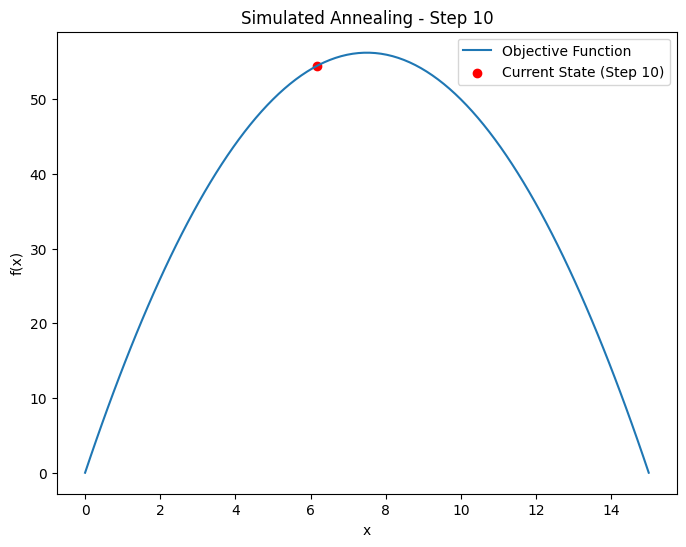

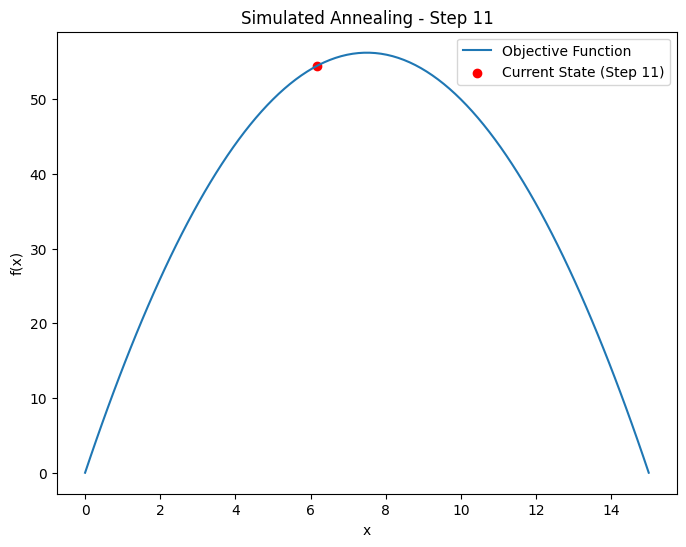

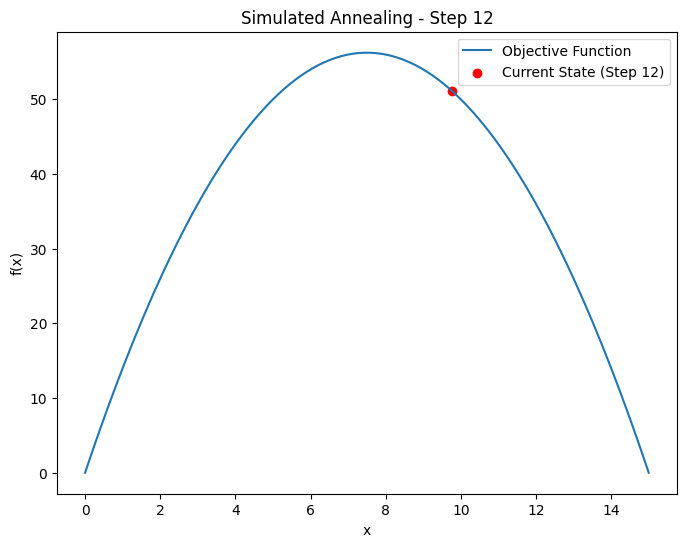

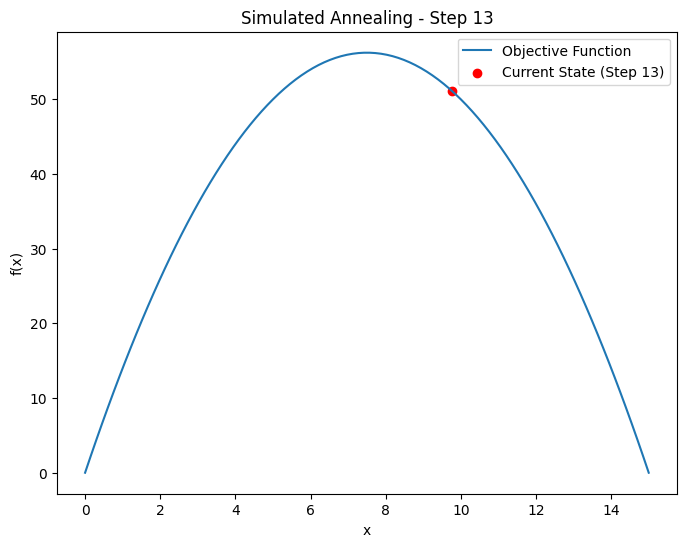

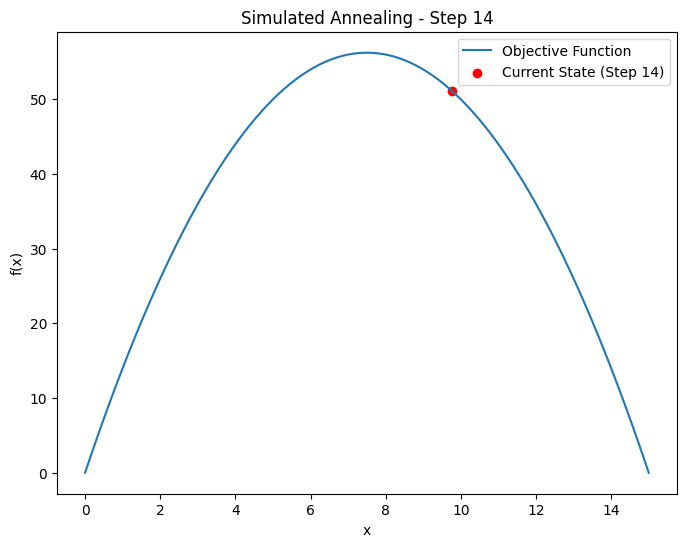

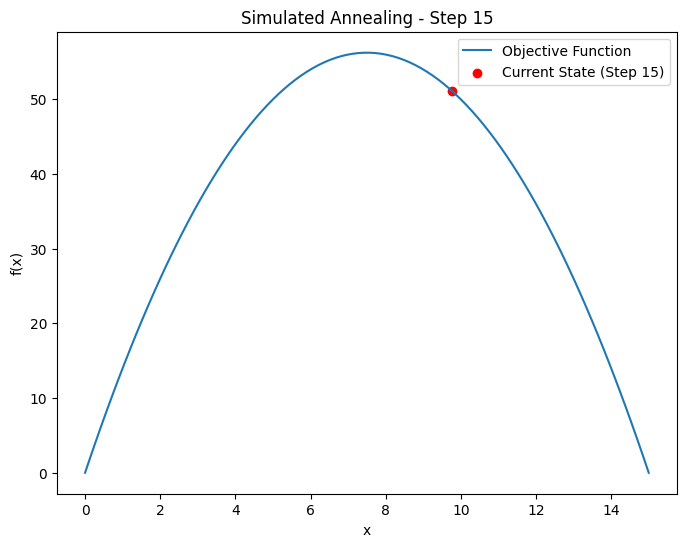

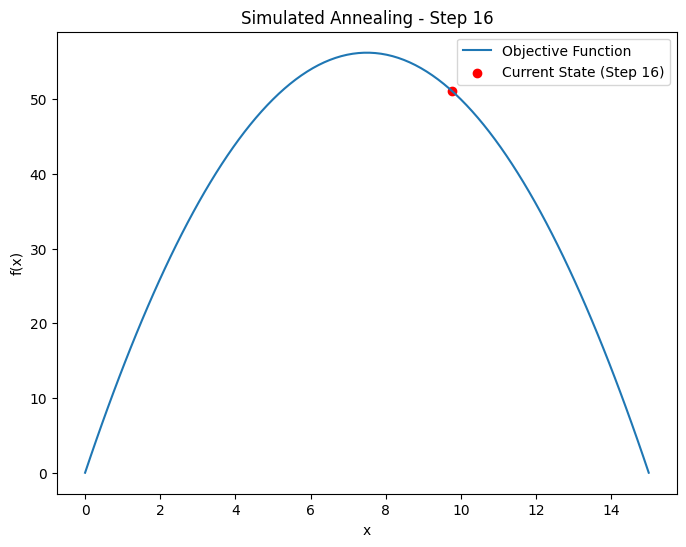

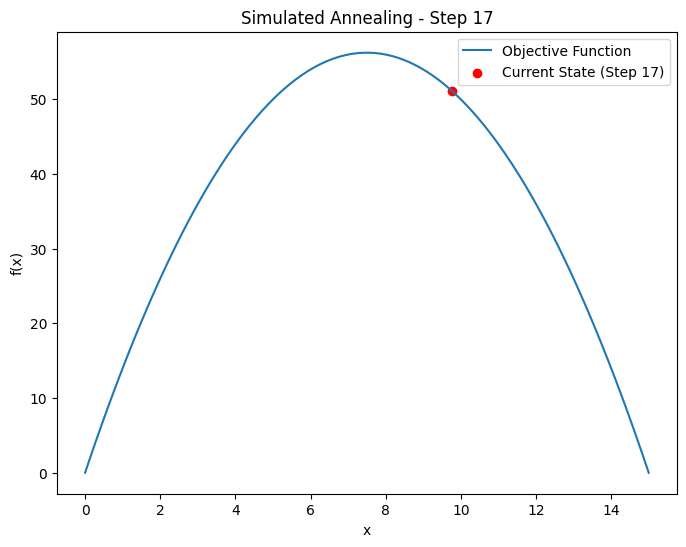

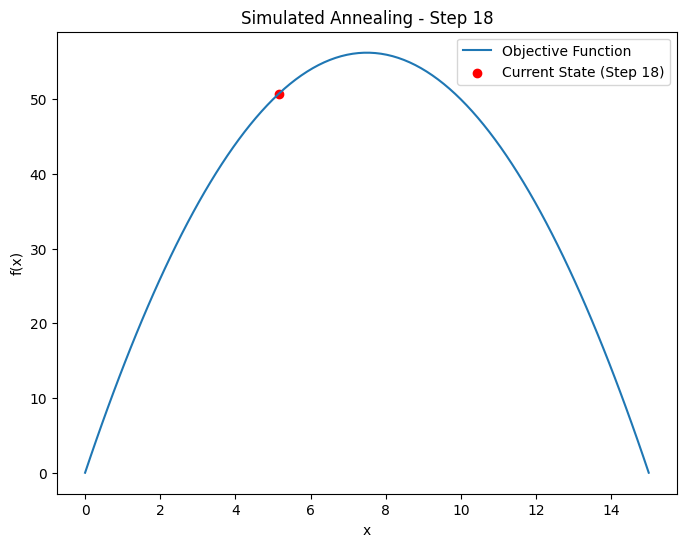

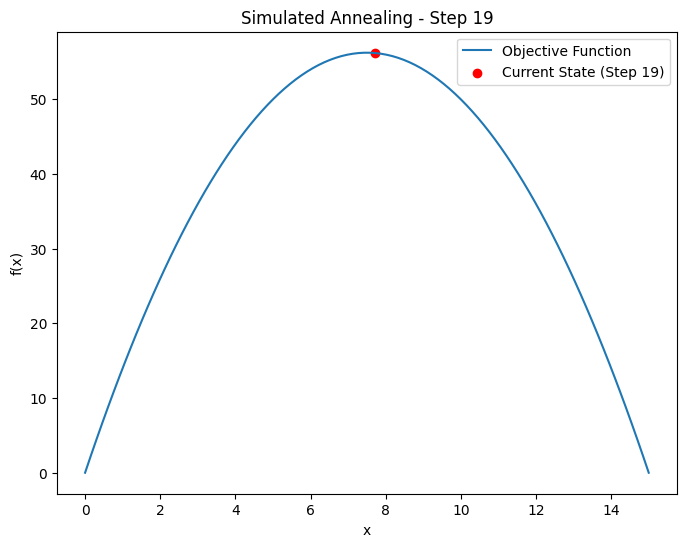

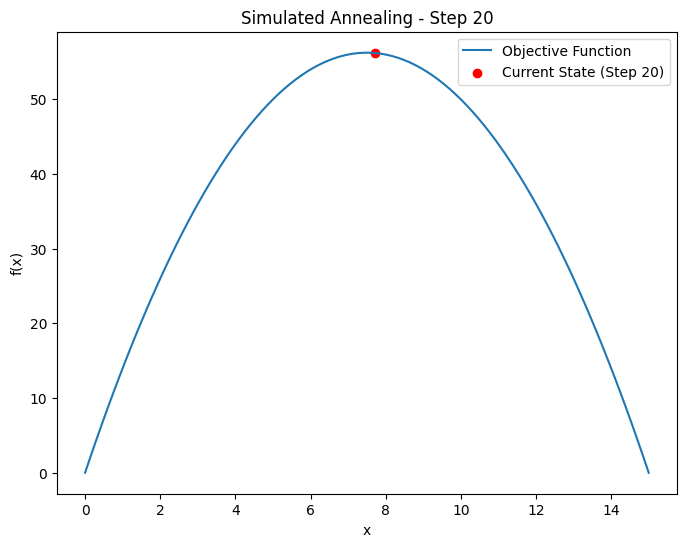

Optimal solution: 7.711867193676575
Maximum value of the simple function: 56.20511229224362


In [6]:
def function(x):
    return 15 * x - x * x

def simulated_annealing_with_plot(obj_function, initial_temperature, alpha, S, t_max):
    # Set initial temperature
    temperature = initial_temperature
    
    # Find a starting point x_c in S and evaluate f(x_c)
    x_c = np.random.uniform(low=S[0], high=S[1])
    f_x_c = obj_function(x_c)
    
    # Plot initial state
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(S[0], S[1], 100), obj_function(np.linspace(S[0], S[1], 100)), label='Objective Function')
    plt.scatter(x_c, f_x_c, color='red', label='Current State')
    plt.title('Simulated Annealing - Initial State')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    
    for t in range(t_max):
        # Generate a new solution x_n and evaluate f(x_n)
        x_n = np.random.uniform(low=S[0], high=S[1])
        f_x_n = obj_function(x_n)
        
        # Calculate acceptance probability P
        delta_f = f_x_n - f_x_c
        P = np.exp(delta_f / temperature)
        
        # If U(0, 1) < P, update x_c
        if np.random.rand() < P:
            x_c = x_n
            f_x_c = f_x_n
        
        # Update temperature
        temperature *= alpha
        
        # Plot current state at each step
        plt.figure(figsize=(8, 6))
        plt.plot(np.linspace(S[0], S[1], 100), obj_function(np.linspace(S[0], S[1], 100)), label='Objective Function')
        plt.scatter(x_c, f_x_c, color='red', label=f'Current State (Step {t+1})')
        plt.title(f'Simulated Annealing - Step {t+1}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
    
    return x_c, f_x_c

# Set parameters
initial_temperature = 10.0
alpha = 0.95
S = [0, 15]
t_max = 20  # Adjust the number of iterations as needed

# Run simulated annealing with plot for the simple function
result_x, result_value = simulated_annealing_with_plot(function, initial_temperature, alpha, S, t_max)

print("Optimal solution:", result_x)
print("Maximum value of the simple function:", result_value)


In [7]:
def simulated_annealing(obj_function, initial_temperature, alpha, S, t_max):
    # Set initial temperature
    temperature = initial_temperature
    
    # Find a starting point x_c in S and evaluate f(x_c)
    x_c = np.random.uniform(low=S[0], high=S[1], size=2)
    f_x_c = obj_function(x_c)
    
    for t in range(t_max):
        # Generate a new solution x_n and evaluate f(x_n)
        x_n = np.random.uniform(low=S[0], high=S[1], size=2)
        f_x_n = obj_function(x_n)
        
        # Calculate acceptance probability P
        delta_f = f_x_n - f_x_c
        P = np.exp(delta_f / temperature)
        
        # If U(0, 1) < P, update x_c
        if np.random.rand() < P:
            x_c = x_n
            f_x_c = f_x_n
        
        # Update temperature
        temperature *= alpha
    
    return x_c, f_x_c

# Example usage with the Ackley function

# Set parameters
initial_temperature = 100.0
alpha = 0.95
S = [-5, 5]
t_max = 1000

# Run simulated annealing
result_x, result_value = simulated_annealing(ackley, initial_temperature, alpha, S, t_max)

print("Optimal solution:", result_x)
print("Maximum value of Ackley function:", result_value)


Optimal solution: [-4.61470795  4.7018436 ]
Maximum value of Ackley function: 14.248817242219296


C:\Users\HP\AppData\Local\Temp\ipykernel_8000\4042957800.py:16: RuntimeWarning: overflow encountered in exp
  P = np.exp(delta_f / temperature)


In [8]:
def simulated_annealing(obj_function, initial_temperature, alpha, S, t_max):
    # Set initial temperature
    temperature = initial_temperature
    
    # Find a starting point x_c in S and evaluate f(x_c)
    x_c = np.random.uniform(low=S[0], high=S[1], size=2)
    f_x_c = obj_function(x_c)
    
    for t in range(t_max):
        # Generate a new solution x_n and evaluate f(x_n)
        x_n = np.random.uniform(low=S[0], high=S[1], size=2)
        f_x_n = obj_function(x_n)
        
        # Calculate acceptance probability P
        delta_f = f_x_n - f_x_c
        P = np.exp(delta_f / temperature)
        
        # If U(0, 1) < P, update x_c
        if np.random.rand() < P:
            x_c = x_n
            f_x_c = f_x_n
        
        # Update temperature
        temperature *= alpha
    
    return x_c, f_x_c

# Example usage with the Sphere function

# Set parameters
initial_temperature = 100.0
alpha = 0.95
S = [-5, 5]
t_max = 1000

# Run simulated annealing
result_x, result_value = simulated_annealing(sphere, initial_temperature, alpha, S, t_max)

print("Optimal solution:", result_x)
print("Maximum value of Sphere function:", result_value)


Optimal solution: [-4.56464767 -4.93752456]
Maximum value of Sphere function: 45.215157117974066
